# Repetition from Day 1
ToDo: Which topics to repeat? Prepare here?

# Day 2, before lunch: Time series analysis


Next step: Read stuff using pandas, making use of it's time series analysis and statistics functions

In [1]:
import pandas as pd

df = pd.read_table('d1s2/rr24_Bulken.txt', encoding='utf8', 
                   header=13,                       # The 14th non-empty row contains the column headers
                   skipfooter=12, engine='python',  # The file contains 12 footer lines, and skipfooter requires the python parsing engine
                   sep='\s+',                       # Column separtion by one or more whitespace
                   parse_dates=[1,], dayfirst=True, # Second column contains dates, in European format
                   index_col=1,                     # Use the date column as index
)

# Note the use of column headers as attributes!
df.RR.plot()

What is this ``df.RR``, and what else can we do with it?

In [2]:
type(df.RR)

pandas.core.series.Series

In [3]:
dir(df.RR)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 

Many things available! We'll dive into a few of them later. 

First, a quick and easy first data analysis: Cumulative precipitation during that period.

In [4]:
type(df.RR.cumsum())

pandas.core.series.Series

Note: ``cumsum()`` returns a time series, so we can work with that in exactly the same way as ``df.RR``.

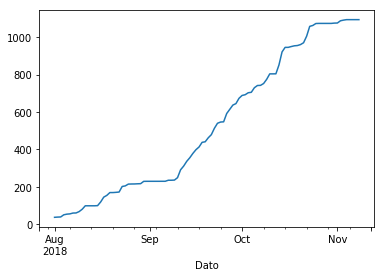

In [5]:
df.RR.cumsum().plot()

Second example, find dates where the 24-hour precipitation exceeded 50 mm.

In [6]:
df.index[df.RR > 50]

DatetimeIndex(['2018-10-14', '2018-10-23'], dtype='datetime64[ns]', name='Dato', freq=None)

Worth taking some time to figure out in detail what happens here.

In [7]:
type(df.RR > 50), (df.RR > 50).dtype, len(df.RR)

(pandas.core.series.Series, dtype('bool'), 100)

We're using a boolean time series to select dates.

We could also use any other (random) boolean time series of length 100.

In [8]:
import numpy as np

randombools = pd.Series(np.random.rand(100) >= 0.9, index=df.RR)
randombools.sum() # How many True values (=ones) are there in the time series?

11

In [9]:
df.index[randombools]

DatetimeIndex(['2018-09-01', '2018-09-02', '2018-09-04', '2018-09-06',
               '2018-09-12', '2018-09-19', '2018-09-30', '2018-10-07',
               '2018-10-23', '2018-11-03', '2018-11-06'],
              dtype='datetime64[ns]', name='Dato', freq=None)

## Comparing time series

So far we have only worked with one time series. Let's add a second to have some more analysis options to explore.

Unfortunately, the date format of ``rro_Bulken.txt`` is not recognised automatically by pandas, so we need to supply our custom conversion function.

In [10]:
from datetime import datetime

date_parser = lambda datestr: datetime.strptime(datestr, '%d%m%Y')

This ``lambda`` is essentially just a shorthand for defining a function. We can use ``date_parser`` just as any other function.

In [11]:
date_parser('23012019')

datetime.datetime(2019, 1, 23, 0, 0)

In [12]:
df2 = pd.read_table('d1s2/rro_Bulken.txt', encoding='latin1', 
                   header=None, names=['Dato', 'Level', 'Discharge', 'p75', 'p50', 'p25'],
                                                    # Custom header information
                   comment='#',                     # Ignore lines starting with #
                   na_values=['----', ],            # Custom marker for missing values
                   sep='\s+',                       # Column separtion by one or more whitespace
                   parse_dates=[0,], date_parser=date_parser, 
                                                    # First column contains dates, custom format
                   index_col=0,                     # Use the date column as index
)

A quick sanity check to see whether we got what we expected.

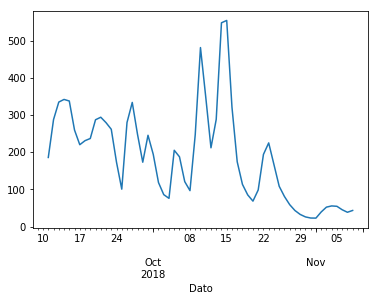

In [13]:
df2.Discharge.plot()

### Correlation analyses

Is river runoff correlated to precipitation?

In [14]:
# Note the different time periods for df and df2!
df.RR.corr(df2.Discharge)

0.6685258367946895

Seems like!

But what about the median discharge and precipitation?

In [15]:
df2.p50.corr(df.RR)

0.19536400129978504

More advance statistics will require the ``scipy.stats`` module. But to be able to use that module, we'll need to homogenise the two time series:
 * Identical index, i.e. dates
 * Remove NaNs
 
Once complete, we'll then make use of ``scipy.stats`` to estimate the significance of the above correlations and calculate lagged correlations between the two time series.

In [16]:
# First combine into common data frame, using the same index
dfa = pd.concat([df, df2], axis=1)

In [17]:
dfa

,Stnr,RR,SA,SD,SLAG,Level,Discharge,p75,p50,p25
Dato,,,,,,,,,,
2018-08-01,51470.0,36.7,0,-,-,NaN,NaN,NaN,NaN,NaN
2018-08-02,51470.0,1.2,0,-,-,NaN,NaN,NaN,NaN,NaN
2018-08-03,51470.0,0.7,0,-,-,NaN,NaN,NaN,NaN,NaN
2018-08-04,51470.0,11.5,0,-,-,NaN,NaN,NaN,NaN,NaN
2018-08-05,51470.0,3.5,0,-,-,NaN,NaN,NaN,NaN,NaN
2018-08-06,51470.0,1.5,0,-,-,NaN,NaN,NaN,NaN,NaN
2018-08-07,51470.0,4.4,0,-,-,NaN,NaN,NaN,NaN,NaN
2018-08-08,51470.0,0.5,0,-,-,NaN,NaN,NaN,NaN,NaN
2018-08-09,51470.0,7.3,0,-,-,NaN,NaN,NaN,NaN,NaN


In [18]:
# Then extract the columns we are interested in, keeping only those rows where we have data in both
df_clean = dfa[['RR', 'Discharge']].dropna()

In [19]:
df_clean

,RR,Discharge
Dato,,
2018-09-11,42.2,186.1244
2018-09-12,19.8,288.1534
2018-09-13,25.4,335.3013
2018-09-14,19.2,342.3569
2018-09-15,23.1,338.1367
2018-09-16,19.8,259.8688
2018-09-17,14.5,220.4581
2018-09-18,24.9,231.3424
2018-09-19,2.9,237.1843


Now we're finally ready to calculate the Pearson correlaton including it's significance. Documentation for the function is given here:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

In [20]:
import scipy.stats

scipy.stats.pearsonr(df_clean.RR, df_clean.Discharge)

(0.6685258367946895, 7.204354023820335e-09)

Cool, seems highly significant!

In [21]:
df_clean = dfa[['RR', 'p50']].dropna()
scipy.stats.pearsonr(df_clean.RR, df_clean.p50)

(0.19536400129978504, 0.1381163858176978)

While the correlation between median discharge and precipitation seems spurious.

With that clarified, onto lagged correlations.

### Exercise 1: Lagged correlations

At which lead/lag in days does the correlation between precipitation reach it's maximum?

The ``pandas.Series.shift`` function might come in handy for the analysis.

In [22]:
tshifts = np.arange(-5,6)
corrcoefs = np.empty(tshifts.shape)
pvalues = np.empty(tshifts.shape)
for i, tshift in zip(range(len(tshifts)), tshifts):
    RRshift = df.RR.shift(tshift)
    dfs = pd.concat([RRshift, df2.Discharge], axis=1)
    dfs = dfs.dropna()
    corrcoefs[i], pvalues[i] = scipy.stats.pearsonr(dfs.RR, dfs.Discharge)

Text(0,0.5,'Correlation coefficient')

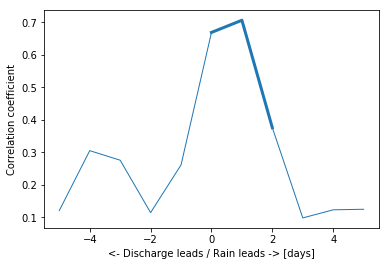

In [23]:
import matplotlib.pyplot as plt

plt.plot(tshifts, corrcoefs, linewidth=1, color='C0')
plt.plot(tshifts[pvalues < 0.01], corrcoefs[pvalues < 0.01], linewidth=3, color='C0')
plt.xlabel('<- Discharge leads / Rain leads -> [days]')
plt.ylabel('Correlation coefficient')

### Exercise 2: Smoothing time series

The river discharge might contain an integral of the precipitation over the preceeding days. Let's correlate smoothed precipitation with discharge, to see whether we can further increase the correlations. Use running means of 1-5 days centred on the given date in combination with lags between -5 and 5 days to find the maximum correlation.

The ``pandas.Series.rolling`` function might come in handy for calculating the running mean.

In [24]:
rmeans = np.arange(1,6)
tshifts = np.arange(-5,6)
corrcoefs = np.empty(rmeans.shape+tshifts.shape)
pvalues = np.empty(rmeans.shape+tshifts.shape)
for j, rmean in zip(range(len(rmeans)), rmeans):
    RRmean = df.RR.rolling(window=rmean, center=True).mean()
    for i, tshift in zip(range(len(tshifts)), tshifts):
        RRshift = RRmean.shift(tshift)
        dfs = pd.concat([RRshift, df2.Discharge], axis=1)
        dfs = dfs.dropna()
        corrcoefs[j,i], pvalues[j,i] = scipy.stats.pearsonr(dfs.RR, dfs.Discharge)

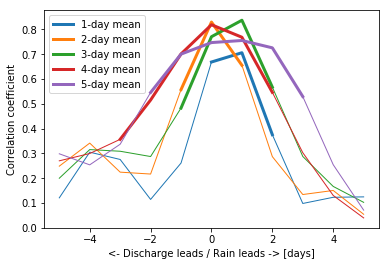

In [25]:
for j, rmean in zip(range(len(rmeans)), rmeans):
    plt.plot(tshifts, corrcoefs[j], linewidth=1, color='C%d' % j)
    plt.plot(tshifts[pvalues[j,:] < 0.01], corrcoefs[j,pvalues[j,:] < 0.01], 
             linewidth=3, color='C%d' % j, label='%d-day mean' % rmean)
plt.xlabel('<- Discharge leads / Rain leads -> [days]')
plt.ylabel('Correlation coefficient')
plt.legend()

### Exercise 3: Fitting linear model

For the combination of running mean and time lag that yields the maximum correlation create a linear model to estimate discharge from observed precipitation. Visualise the results in a scatter as well as a time-series plot comparing predicted and actual discharge.

In [26]:
jmax, imax = np.unravel_index(np.argmax(corrcoefs), corrcoefs.shape)
print('Maximum correlation of %3.1f%% at rmean %d days and lag %d days' % (corrcoefs.max()*100, rmeans[jmax], tshifts[imax]))

Maximum correlation of 83.7% at rmean 3 days and lag 1 days


Recreate the shifted running mean that gave the maximum correlation 

In [27]:
RRmax = df.RR.rolling(window=rmeans[jmax], center=True).mean().shift(tshifts[imax])

Collect all relevant ``Series`` in a new data frame

In [28]:
# Rename column to avoid having two columns named "RR", then concatenate to one dataframe
RRmax.rename('RRmax', inplace=True)
dfs = pd.concat([RRmax, df.RR, df2.Discharge], axis=1)
dfs_clean = dfs.dropna()

Fit the linear model by linear regression

In [29]:
linmodel = scipy.stats.linregress(dfs_clean.RRmax, dfs_clean.Discharge)
estimate_Discharge = lambda RRm: linmodel.slope*RRm + linmodel.intercept
dfs['Discharge_linmodel'] = pd.Series(estimate_Discharge(dfs.RRmax), index=dfs.index)

Scatter plot for evaluation

Text(0,0.5,'Estimated discharge from precipitation [m3/s]')

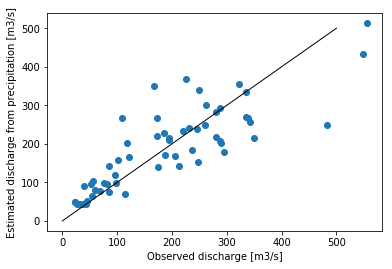

In [30]:
plt.scatter(dfs.Discharge, dfs.Discharge_linmodel)
plt.plot([0, 500], [0, 500], 'k-', linewidth=1)
plt.xlabel('Observed discharge [m3/s]')
plt.ylabel('Estimated discharge from precipitation [m3/s]')

Time series plot for evaluation

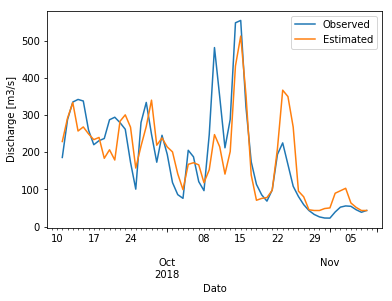

In [31]:
dfs_clean = dfs.dropna()
dfs_clean.Discharge.plot(label='Observed')
dfs_clean.Discharge_linmodel.plot(label='Estimated')
plt.ylabel('Discharge [m3/s]')
plt.legend()